UNCOMMENTED QUICK AND DIRTY READOUT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/home/eric/sim/WWLegend/Output/GerdaRuns/Gerda_nt_Score_t0.csv'
df = pd.read_csv(file_path, sep=',', header=12)


# Initialize empty NumPy arrays for each column
column_arrays = [np.empty(df.shape[0], dtype=object) for _ in range(8)]

# Its doing fine just ignorring the first row for some reason

# Iterate over each column and fill the NumPy arrays
for i, column in enumerate(df.columns):
    # Split each entry using ';' and convert to NumPy arrays
    column_arrays[i] = df[column].apply(lambda x: np.array(str(x).split(';'))).values

Water_energies = column_arrays[0]
Water_times = column_arrays[1]
LAr_energies = column_arrays[2]
LAr_times = column_arrays[3]
Ge_Amounts = column_arrays[4]
Ge_energies = column_arrays[5]
Ge_times = column_arrays[6]
Gd_times = column_arrays[7]
print(np.size(Gd_times))

29


In [3]:
firstWaterEnergies = Water_energies[1].astype(float)
firstWaterTimes = Water_times[1].astype(float)
firstLArEnergies = LAr_energies[1].astype(float)
firstLArTimes = LAr_times[1].astype(float)
firstGeEnergies = Ge_energies[1].astype(float)
firstGeTimes = Ge_times[1].astype(float)
firstGdTimes = Gd_times[1].astype(float)
def getEvent(num):
    global firstWaterEnergies, firstWaterTimes, firstLArEnergies, firstLArTimes, firstGeEnergies, firstGeTimes, firstGdTimes
    firstWaterEnergies = Water_energies[num].astype(float)
    firstWaterTimes = Water_times[num].astype(float)
    firstLArEnergies = LAr_energies[num].astype(float)
    firstLArTimes = LAr_times[num].astype(float)
    firstGeEnergies = Ge_energies[num].astype(float)
    firstGeTimes = Ge_times[num].astype(float)
    firstGdTimes = Gd_times[num].astype(float)



HISTOGRAM

[67.5795 46.4768]


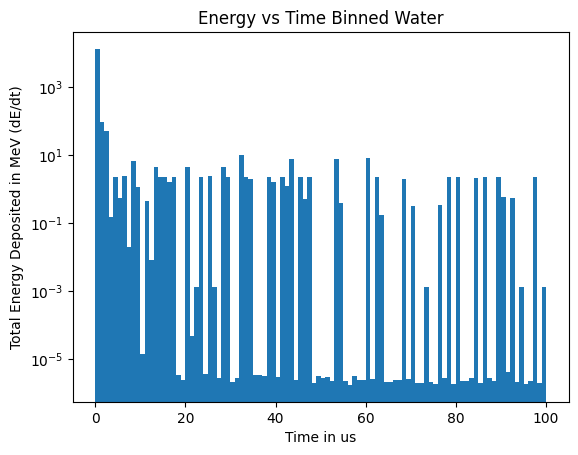

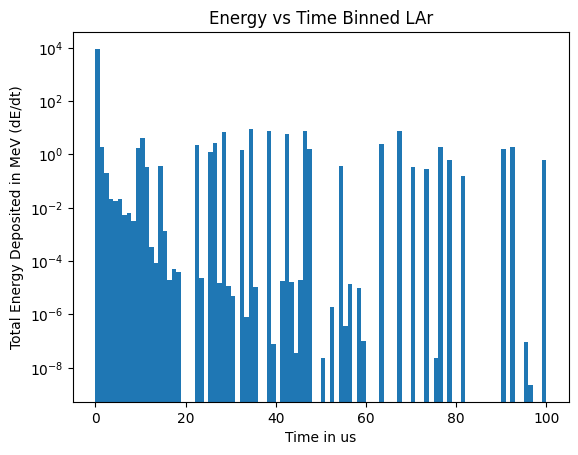

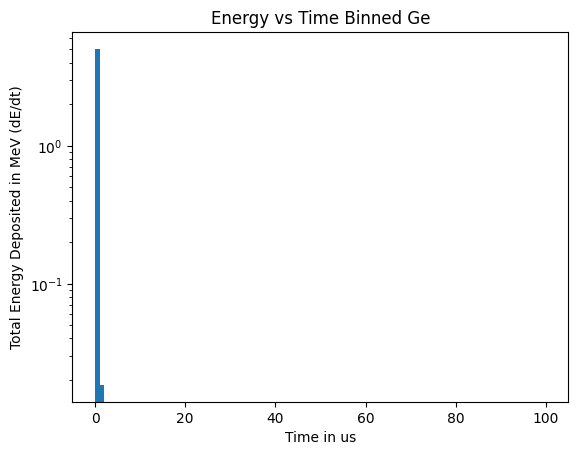

In [4]:
getEvent(0)
print(firstGdTimes)
def BinPlot(time_of_deposition, energy_deposited, name):
    n_time_bins = 100
    time_range = (0, 100)

    # Calculate the histogram of time bins
    hist, time_bin_edges = np.histogram(time_of_deposition, bins=n_time_bins, range=time_range)

    # Initialize an array to store total energy deposited in each time bin
    total_energy_per_time_bin = np.zeros(n_time_bins)

    # Loop through each time bin and sum the corresponding energy values
    for i in range(n_time_bins):
        mask = np.logical_and(time_of_deposition >= time_bin_edges[i], time_of_deposition < time_bin_edges[i + 1])
        total_energy_per_time_bin[i] = np.sum(energy_deposited[mask]) / (1e6)

    # Plot the results
    plt.bar(time_bin_edges[:-1], total_energy_per_time_bin, width=np.diff(time_bin_edges), align='edge')
    #plt.vlines(firstGdTimes, ymin=0, ymax=np.max(total_energy_per_time_bin), colors="red")
    plt.yscale('log')
    # Add labels and title
    plt.xlabel('Time in us')
    plt.ylabel('Total Energy Deposited in MeV (dE/dt)')
    plt.title('Energy vs Time Binned ' + name)

    plt.show()
BinPlot(firstWaterTimes, firstWaterEnergies, "Water")
BinPlot(firstLArTimes, firstLArEnergies, "LAr")
BinPlot(firstGeTimes, firstGeEnergies, "Ge")

ALL IN ONE

[ 83.0091 119.469   13.7377  84.3517]


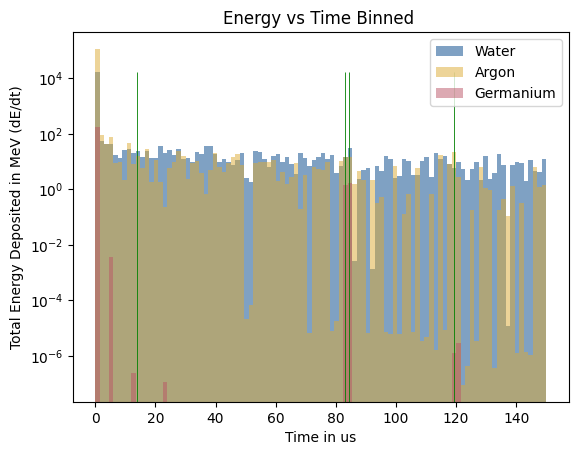

In [8]:
getEvent(27)
print(firstGdTimes)
def BinPlot(time_of_deposition, energy_deposited, color, label):
    n_time_bins = 100
    time_range = (0, 150)

    # Calculate the histogram of time bins
    hist, time_bin_edges = np.histogram(time_of_deposition, bins=n_time_bins, range=time_range)

    # Initialize an array to store total energy deposited in each time bin
    total_energy_per_time_bin = np.zeros(n_time_bins)

    # Loop through each time bin and sum the corresponding energy values
    for i in range(n_time_bins):
        mask = np.logical_and(time_of_deposition >= time_bin_edges[i], time_of_deposition < time_bin_edges[i + 1])
        total_energy_per_time_bin[i] = np.sum(energy_deposited[mask]) / (1e6)

    # Plot the results
    plt.bar(time_bin_edges[:-1], total_energy_per_time_bin, width=np.diff(time_bin_edges), align='edge', color=color, alpha = 0.5, label=label)
    if(label == "Water"):
        plt.vlines(firstGdTimes, ymin=0, ymax=np.max(total_energy_per_time_bin), colors="green", linewidth=0.6)
    plt.yscale('log')
    # Add labels and title
    
BinPlot(firstWaterTimes, firstWaterEnergies, "#004488", "Water")
BinPlot(firstLArTimes, firstLArEnergies, "#DDAA33", "Argon")
BinPlot(firstGeTimes, firstGeEnergies, "#BB5566", "Germanium")
plt.xlabel('Time in us')
plt.ylabel('Total Energy Deposited in MeV (dE/dt)')
plt.title('Energy vs Time Binned ')
plt.legend()
#plt.savefig("/home/eric/sim/WWLegend/Plots/PartyEvent.png")
plt.show()
#Event 12 looks very good
#Event 16 + 19 + 21 to investigate cut
#Event 27 party

EVENTS CLOSE TO MUON

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


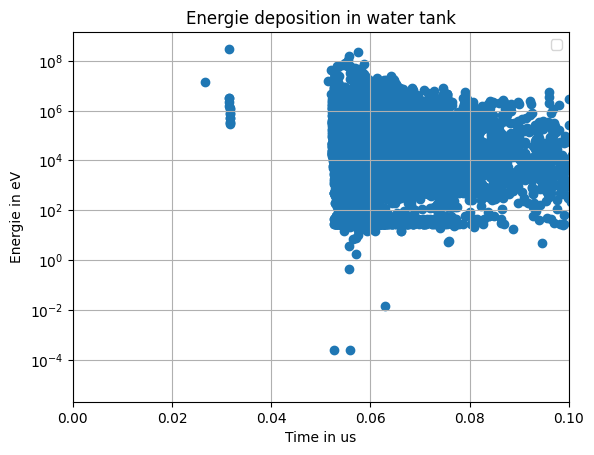

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


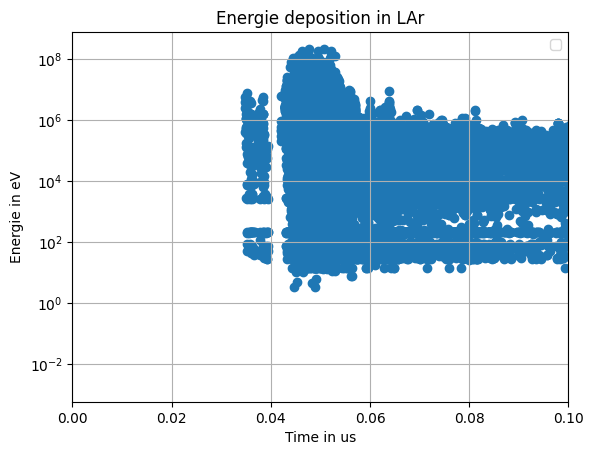

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


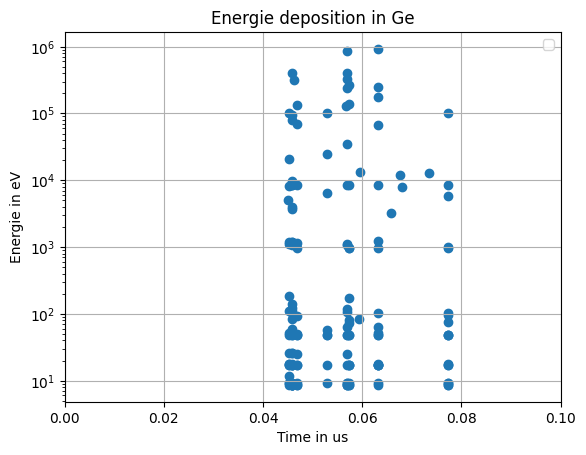

In [6]:
getEvent(2)

fig, ax = plt.subplots()

ax.scatter(firstWaterTimes, firstWaterEnergies)


ax.set_xlabel('Time in us')
ax.set_ylabel('Energie in eV')
ax.set_title('Energie deposition in water tank')
ax.legend(loc= "upper right")
ax.set_yscale("log")
ax.grid()
ax.set_xlim(xmin= 0, xmax=0.1)

#plt.savefig("/home/eric/sim/WWLegend/Plots/WaterFirst100ns.png")
plt.show()

fig, ax = plt.subplots()

ax.scatter(firstLArTimes, firstLArEnergies)


ax.set_xlabel('Time in us')
ax.set_ylabel('Energie in eV')
ax.set_title('Energie deposition in LAr')
ax.legend(loc= "upper right")
ax.set_yscale("log")
ax.grid()
ax.set_xlim(xmin= 0, xmax=0.1)
#plt.savefig("/home/eric/sim/WWLegend/Plots/LArFirst100ns.png")
plt.show()

fig, ax = plt.subplots()

ax.scatter(firstGeTimes, firstGeEnergies)


ax.set_xlabel('Time in us')
ax.set_ylabel('Energie in eV')
ax.set_title('Energie deposition in Ge')
ax.legend(loc= "upper right")
ax.set_yscale("log")
ax.grid()
ax.set_xlim(xmin= 0, xmax=0.1)
#plt.savefig("/home/eric/sim/WWLegend/Plots/GeFirst100ns.png")
plt.show()


200 us AFTER MUON

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


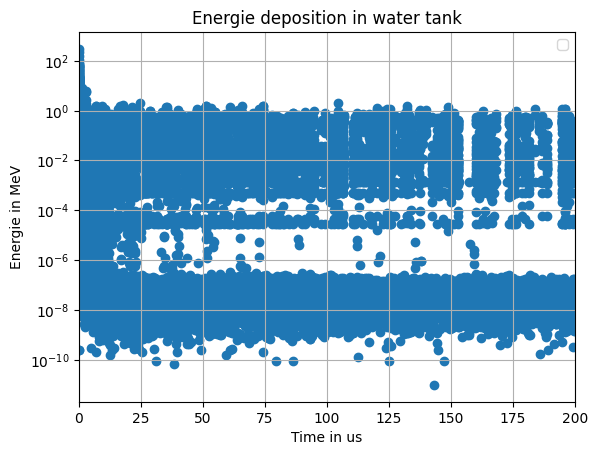

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


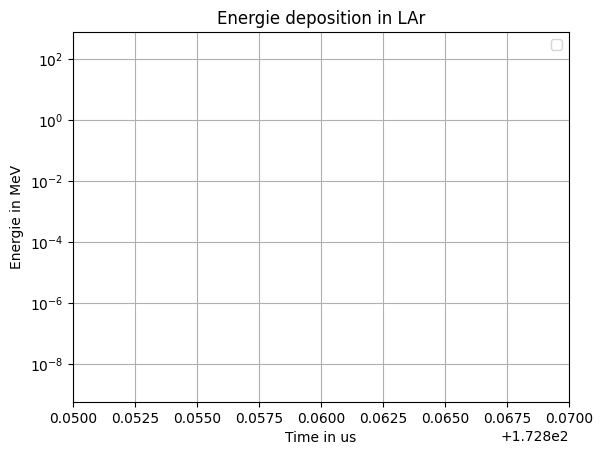

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


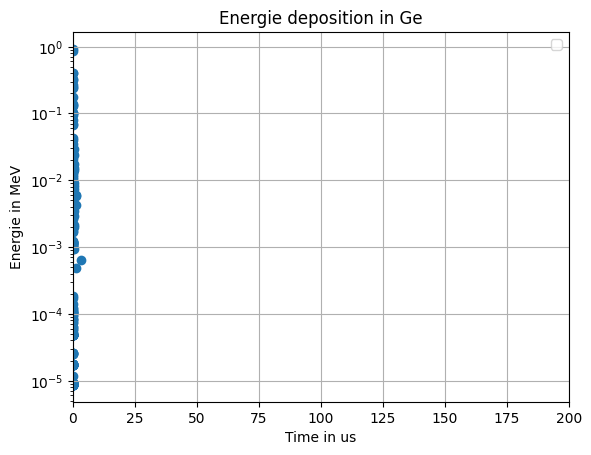

In [7]:
getEvent(2)

fig, ax = plt.subplots()

ax.scatter(firstWaterTimes, firstWaterEnergies / (1e6))


ax.set_xlabel('Time in us')
ax.set_ylabel('Energie in MeV')
ax.set_title('Energie deposition in water tank')
ax.legend(loc= "upper right")
ax.set_yscale("log")
ax.grid()
ax.set_xlim(xmin= 0, xmax=200)

#plt.savefig("/home/eric/sim/WWLegend/Plots/WaterFirst100ns.png")
plt.show()

fig, ax = plt.subplots()

ax.scatter(firstLArTimes, firstLArEnergies / (1e6))


ax.set_xlabel('Time in us')
ax.set_ylabel('Energie in MeV')
ax.set_title('Energie deposition in LAr')
ax.legend(loc= "upper right")
ax.set_yscale("log")
ax.grid()
ax.set_xlim(xmin= 172.85, xmax=172.87)
#plt.savefig("/home/eric/sim/WWLegend/Plots/FirstSusEventLAr.png")
plt.show()

fig, ax = plt.subplots()

ax.scatter(firstGeTimes, firstGeEnergies / (1e6))


ax.set_xlabel('Time in us')
ax.set_ylabel('Energie in MeV')
ax.set_title('Energie deposition in Ge')
ax.legend(loc= "upper right")
ax.set_yscale("log")
ax.grid()
ax.set_xlim(xmin= 0, xmax=200)
#plt.savefig("/home/eric/sim/WWLegend/Plots/GeFirst100ns.png")
plt.show()